In [1]:
import sys
import os
import glob
import keras
import matplotlib.pyplot as plt
from skimage import transform,io
from skimage.filters import threshold_mean
import numpy as np
import keras
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
sys.path.append('../data')

In [3]:
DATA_PATH = '../data/'
IMG_PATH = os.path.join(DATA_PATH, "extracted_images")
SYMBOL_LIST_PATH = os.path.join(DATA_PATH, "handwritten_math_symbols")

In [4]:
TARGET_IMAGE_SIZE = (32,32)

In [5]:
with open(SYMBOL_LIST_PATH) as f:
    symbols_list = f.read().split("\n")
num_classes = len(symbols_list)

In [6]:
def read_image(image_path):
    # read
    im = io.imread(a_img_path)
        
    # resize
    im = transform.resize(im, TARGET_IMAGE_SIZE, mode='symmetric', preserve_range=True)
    
    # threashold to convert it to binary
    thresh = threshold_mean(im)
    binary = im > thresh

    # binary conversion
    binary[binary == True] = 1
    binary[binary == False] = 0
    
    return binary

In [7]:
X = [] 
Y = []

for i in range(len(symbols_list)):
    for a_img_path in glob.glob(os.path.join(IMG_PATH, symbols_list[i]) + "/*.jpg"):
        
        # read
        im = io.imread(a_img_path)
        
        # resize
        im = transform.resize(im, TARGET_IMAGE_SIZE, mode='symmetric', preserve_range=True)
        
        # threashold to convert it to binary
        thresh = threshold_mean(im)
        binary = im > thresh
        
        # binary conversion
        binary[binary == True] = 1
        binary[binary == False] = 0
        
        X.append(binary)
        Y.append(i)

/home/sharmistha/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [8]:
len(X)

375974

In [9]:
Y = keras.utils.to_categorical(Y, num_classes)

In [10]:
X = np.array(X)
Y = np.array(Y)

In [74]:
# resized
X = X.reshape((len(X),32, 32))

In [75]:
X, Y = shuffle(X, Y, random_state=23)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=46, shuffle=True)

In [76]:
print("X_train " + str(X_train.shape))
print("X_test " + str(X_test.shape))

X_train (263181, 32, 32)
X_test (112793, 32, 32)


In [77]:
print("y_train " + str(y_train.shape))
print("y_test " + str(y_test.shape))

y_train (263181, 83)
y_test (112793, 83)


In [32]:
# plt.imshow(X[90000]) 

In [33]:
for i in range(0,83):
    if Y[90000][i] == 1:
        wow = i
        break
symbols_list[wow]

'v'

In [242]:
# Model

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ModelCheckpoint

In [290]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(TARGET_IMAGE_SIZE[0],TARGET_IMAGE_SIZE[1],1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [291]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
activation_73 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_74 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 12, 12, 64)        18496     
__________

In [80]:
X_train = format_train_for_keras_fit(X_train)
X_test = format_train_for_keras_fit(X_test)

In [258]:
checkpoints = ModelCheckpoint('../trained_models/model-epoch:{epoch:02d}-acc:{acc:.3f}-val_acc{val_acc:.3f}.hdf5',
                              monitor='val_acc',
                              verbose=1,
                              save_best_only=True,
                              save_weights_only=True,
                              mode='max',
                              period=1)

In [259]:
model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test,y_test),
    callbacks= [checkpoints]
)

Train on 263181 samples, validate on 112793 samples
Epoch 1/10
263181/263181 [==============================] - 40s 151us/step - loss: 0.6170 - acc: 0.8346 - val_loss: 0.2129 - val_acc: 0.9360

Epoch 00001: val_acc improved from -inf to 0.93602, saving model to ../trained_models/model-epoch:01-acc:0.835-val_acc0.936.hdf5
Epoch 2/10
263181/263181 [==============================] - 40s 150us/step - loss: 0.2668 - acc: 0.9196 - val_loss: 0.1607 - val_acc: 0.9504

Epoch 00002: val_acc improved from 0.93602 to 0.95040, saving model to ../trained_models/model-epoch:02-acc:0.920-val_acc0.950.hdf5
Epoch 3/10
263181/263181 [==============================] - 39s 150us/step - loss: 0.2155 - acc: 0.9331 - val_loss: 0.1322 - val_acc: 0.9587

Epoch 00003: val_acc improved from 0.95040 to 0.95869, saving model to ../trained_models/model-epoch:03-acc:0.933-val_acc0.959.hdf5
Epoch 4/10
263181/263181 [==============================] - 40s 150us/step - loss: 0.1865 - acc: 0.9405 - val_loss: 0.1187 - val_

In [260]:
# best model seems to be: model-epoch:06-acc:0.950-val_acc0.969.hd

In [20]:
def f(img):
    img[img>0]=1
    return img

datagen = ImageDataGenerator(
    preprocessing_function=f
)

In [21]:

train_generator = datagen.flow_from_directory(
        IMG_PATH,
        classes=symbols_list,
        color_mode='grayscale',
        target_size=TARGET_IMAGE_SIZE,
        batch_size=BATCH_SIZE
)


Found 751948 images belonging to 83 classes.


In [64]:
# model.fit_generator(
#         train_generator,
#         steps_per_epoch = 751948 // BATCH_SIZE,
#         epochs=10
# )

In [79]:
def format_train_for_keras_fit(_X):
     return np.transpose(_X.reshape(len(_X), TARGET_IMAGE_SIZE[0], TARGET_IMAGE_SIZE[1], 1), axes=[0,2,1,3])

In [261]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [262]:
layer_dict

{'activation_67': <keras.layers.core.Activation at 0x7efb198aae80>,
 'activation_68': <keras.layers.core.Activation at 0x7efb198ac080>,
 'activation_69': <keras.layers.core.Activation at 0x7efb198a4e48>,
 'activation_70': <keras.layers.core.Activation at 0x7efb198befd0>,
 'activation_71': <keras.layers.core.Activation at 0x7efb198192b0>,
 'activation_72': <keras.layers.core.Activation at 0x7efb197cdd68>,
 'conv2d_49': <keras.layers.convolutional.Conv2D at 0x7efb198aae10>,
 'conv2d_50': <keras.layers.convolutional.Conv2D at 0x7efb198ac320>,
 'conv2d_51': <keras.layers.convolutional.Conv2D at 0x7efb198a4470>,
 'conv2d_52': <keras.layers.convolutional.Conv2D at 0x7efb198bef28>,
 'dense_23': <keras.layers.core.Dense at 0x7efb19883c18>,
 'dense_24': <keras.layers.core.Dense at 0x7efb19819240>,
 'dropout_34': <keras.layers.core.Dropout at 0x7efb198a4048>,
 'dropout_35': <keras.layers.core.Dropout at 0x7efb1986dba8>,
 'dropout_36': <keras.layers.core.Dropout at 0x7efb197cd438>,
 'flatten_12':

In [285]:
i_i = 60

In [286]:
from keras.models import Model

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[i_i].reshape(1,32,32,1))

 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

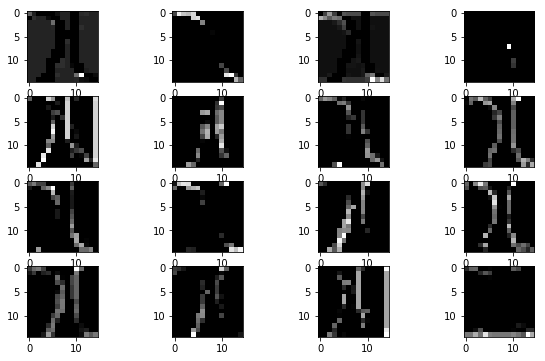

In [287]:
display_activation(activations,4,4,5)

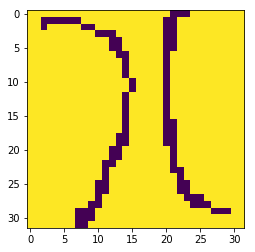

In [289]:
plt.imshow(X_train[i_i].reshape(32,32))

# MLP

In [50]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [61]:
model = Sequential()
model.add(Dense(768, activation='relu', input_shape=(1024,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 768)               787200    
_________________________________________________________________
dropout_9 (Dropout)          (None, 768)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               393728    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 83)                42579     
Total params: 1,223,507
Trainable params: 1,223,507
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [64]:
checkpoints = ModelCheckpoint('../trained_models/mlp_model-epoch:{epoch:02d}-acc:{acc:.3f}-val_acc{val_acc:.3f}.hdf5',
                              monitor='val_acc',
                              verbose=1,
                              save_best_only=True,
                              save_weights_only=True,
                              mode='max',
                              period=1)

In [70]:
history = model.fit(
                X_train,
                y_train,
                epochs=15,
                batch_size=128,
                validation_data=(X_test,y_test),
                callbacks= [checkpoints]
            )

Train on 263181 samples, validate on 112793 samples
Epoch 1/15
263181/263181 [==============================] - 15s 56us/step - loss: 0.4560 - acc: 0.8624 - val_loss: 0.2764 - val_acc: 0.9184

Epoch 00001: val_acc improved from 0.91255 to 0.91840, saving model to ../trained_models/mlp_model-epoch:01-acc:0.862-val_acc0.918.hdf5
Epoch 2/15
263181/263181 [==============================] - 15s 56us/step - loss: 0.4444 - acc: 0.8656 - val_loss: 0.2688 - val_acc: 0.9182

Epoch 00002: val_acc did not improve from 0.91840
Epoch 3/15
263181/263181 [==============================] - 15s 56us/step - loss: 0.4400 - acc: 0.8666 - val_loss: 0.2628 - val_acc: 0.9197

Epoch 00003: val_acc improved from 0.91840 to 0.91971, saving model to ../trained_models/mlp_model-epoch:03-acc:0.867-val_acc0.920.hdf5
Epoch 4/15
263181/263181 [==============================] - 15s 56us/step - loss: 0.4340 - acc: 0.8685 - val_loss: 0.2766 - val_acc: 0.9171

Epoch 00004: val_acc did not improve from 0.91971
Epoch 5/15
2

In [71]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

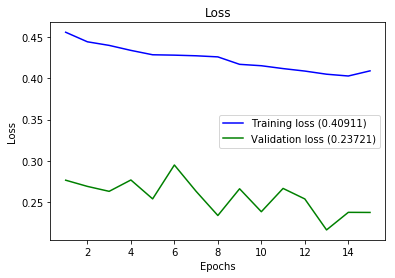

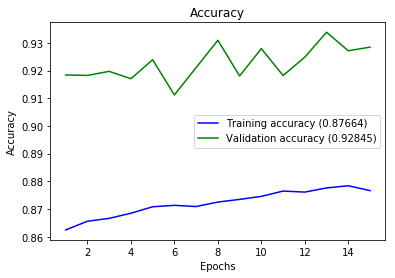

In [72]:
plot_history(history)

## Shallow CNN

In [81]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(TARGET_IMAGE_SIZE[0], TARGET_IMAGE_SIZE[1], 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [82]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [83]:
checkpoints = ModelCheckpoint('../trained_models/small_cnn_model-epoch:{epoch:02d}-acc:{acc:.3f}-val_acc{val_acc:.3f}.hdf5',
                              monitor='val_acc',
                              verbose=1,
                              save_best_only=True,
                              save_weights_only=True,
                              mode='max',
                              period=1)

In [ ]:
history = model.fit(
                X_train,
                y_train,
                epochs=20,
                batch_size=128,
                validation_data=(X_test,y_test),
                callbacks= [checkpoints]
            )

Train on 263181 samples, validate on 112793 samples
Epoch 1/20
263181/263181 [==============================] - 38s 146us/step - loss: 1.0925 - acc: 0.7154 - val_loss: 0.3866 - val_acc: 0.8868

Epoch 00001: val_acc improved from -inf to 0.88677, saving model to ../trained_models/small_cnn_model-epoch:01-acc:0.715-val_acc0.887.hdf5
Epoch 2/20
235136/263181 [=========================>....] - ETA: 3s - loss: 0.6408 - acc: 0.8163

In [ ]:
plot_history(history)